In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [3]:
df_train

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
0,EXA000001,none,male,some college,standard,Section A,70,73,70
1,EXA000002,none,male,master's degree,free/reduced,Section C,55,54,52
2,EXA000003,none,male,master's degree,free/reduced,Section E,56,46,43
3,EXA000004,none,female,some college,free/reduced,Section C,35,47,41
4,EXA000005,none,female,high school,standard,Section C,87,92,81
...,...,...,...,...,...,...,...,...,...
31994,EXA031995,none,male,some high school,free/reduced,Section E,63,53,80
31995,EXA031996,none,female,high school,standard,Section B,100,80,68
31996,EXA031997,none,male,bachelor's degree,free/reduced,Section B,62,61,74
31997,EXA031998,none,male,associate's degree,standard,Section D,75,32,82


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31999 entries, 0 to 31998
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Roll no                      31999 non-null  object
 1   test preparation             31999 non-null  object
 2   gender                       31999 non-null  object
 3   parental level of education  31999 non-null  object
 4   lunch                        31999 non-null  object
 5   Section                      31999 non-null  object
 6   practical score              31999 non-null  int64 
 7   viva score                   31999 non-null  int64 
 8   exam score                   31999 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 2.2+ MB


In [5]:
df_train.isnull().sum()

Roll no                        0
test preparation               0
gender                         0
parental level of education    0
lunch                          0
Section                        0
practical score                0
viva score                     0
exam score                     0
dtype: int64

In [6]:
df_train.describe()

,practical score,viva score,exam score
count,31999.000000,31999.000000,31999.000000
mean,67.839870,70.375168,69.139598
std,15.229898,14.092764,15.009974
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.000000,70.000000
75%,80.000000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [7]:
# Create the target variable 'pass_fail' based on 'exam score' in training data
df_train['pass_fail'] = df_train['exam score'].apply(lambda x: 1 if x >= 65 else 0)

In [8]:
df_train.head()

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score,pass_fail
0,EXA000001,none,male,some college,standard,Section A,70,73,70,1
1,EXA000002,none,male,master's degree,free/reduced,Section C,55,54,52,0
2,EXA000003,none,male,master's degree,free/reduced,Section E,56,46,43,0
3,EXA000004,none,female,some college,free/reduced,Section C,35,47,41,0
4,EXA000005,none,female,high school,standard,Section C,87,92,81,1


In [9]:
df_train.columns

Index(['Roll no', 'test preparation ', 'gender', 'parental level of education',
       'lunch', 'Section', 'practical score', 'viva score', 'exam score',
       'pass_fail'],
      dtype='object')

In [10]:
print("Test preparation unique values:", df_train['test preparation '].unique())
print("Gender unique values:", df_train['gender'].unique())
print("Lunch unique values:", df_train['lunch'].unique())
print("Section unique values:", df_train['Section'].unique())
print("Parental level of education unique values:", df_train['parental level of education'].unique())


Test preparation unique values: ['none' 'completed']
Gender unique values: ['male' 'female']
Lunch unique values: ['standard' 'free/reduced']
Section unique values: ['Section A' 'Section C' 'Section E' 'Section D' 'Section B']
Parental level of education unique values: ['some college' "master's degree" 'high school' "associate's degree"
 'some high school' "bachelor's degree"]


In [11]:
# Define features and target
X_train = df_train.drop(columns=['Roll no', 'pass_fail', 'exam score'])
y_train = df_train['pass_fail']

In [12]:
# Convert categorical variables to numerical for training data
X_train_dummies = pd.get_dummies(X_train, columns=['test preparation ', 'gender', 'lunch', 'Section', 'parental level of education'], drop_first=True)

In [13]:
# Convert boolean columns to integers
X_train_dummies = X_train_dummies.astype(int)

In [14]:
# Verification steps
print("Training DataFrame Info:")
print(X_train_dummies.info())
print("\nFirst Few Rows:")
print(X_train_dummies.head())
print("\nDescriptive Statistics:")
print(X_train_dummies.describe())

Training DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31999 entries, 0 to 31998
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   practical score                                31999 non-null  int64
 1   viva score                                     31999 non-null  int64
 2   test preparation _none                         31999 non-null  int64
 3   gender_male                                    31999 non-null  int64
 4   lunch_standard                                 31999 non-null  int64
 5   Section_Section B                              31999 non-null  int64
 6   Section_Section C                              31999 non-null  int64
 7   Section_Section D                              31999 non-null  int64
 8   Section_Section E                              31999 non-null  int64
 9   parental level of education_bachelor's degree  

In [15]:
# Split the data into training and validation sets
X_train_processed, X_val, y_train_processed, y_val = train_test_split(X_train_dummies, y_train, test_size=0.2, random_state=42)

In [16]:
# Initialize and apply StandardScaler to all columns
scaler = StandardScaler()
X_train_processed_scaled = scaler.fit_transform(X_train_processed)
X_val_scaled = scaler.transform(X_val)

In [17]:
# Convert scaled arrays back to DataFrames with appropriate column names
X_train_processed_scaled = pd.DataFrame(X_train_processed_scaled, columns=X_train_processed.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)

In [18]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'k-NN': KNeighborsClassifier(n_neighbors=25)
}

In [19]:
# Train and predict with each model
predictions = {}
roc_auc_scores = {}
for name, model in models.items():
    model.fit(X_train_processed_scaled, y_train_processed)
    y_pred_proba = model.predict_proba(X_val_scaled)[:, 1]  # Probability estimates
    predictions[name] = y_pred_proba
    y_pred = (y_pred_proba >= 0.5).astype(int)
    print(f"{name} Validation Accuracy: {accuracy_score(y_val, y_pred)}")
    print(f"{name} Classification Report:\n{classification_report(y_val, y_pred)}")
    # Calculate ROC AUC
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores[name] = (fpr, tpr, roc_auc)

Random Forest Validation Accuracy: 0.57546875
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.32      0.36      2396
           1       0.64      0.73      0.68      4004

    accuracy                           0.58      6400
   macro avg       0.53      0.52      0.52      6400
weighted avg       0.56      0.58      0.56      6400

Decision Tree Validation Accuracy: 0.549375
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.42      0.41      2396
           1       0.64      0.63      0.64      4004

    accuracy                           0.55      6400
   macro avg       0.52      0.52      0.52      6400
weighted avg       0.55      0.55      0.55      6400

k-NN Validation Accuracy: 0.5965625
k-NN Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.12      0.18      2396
         

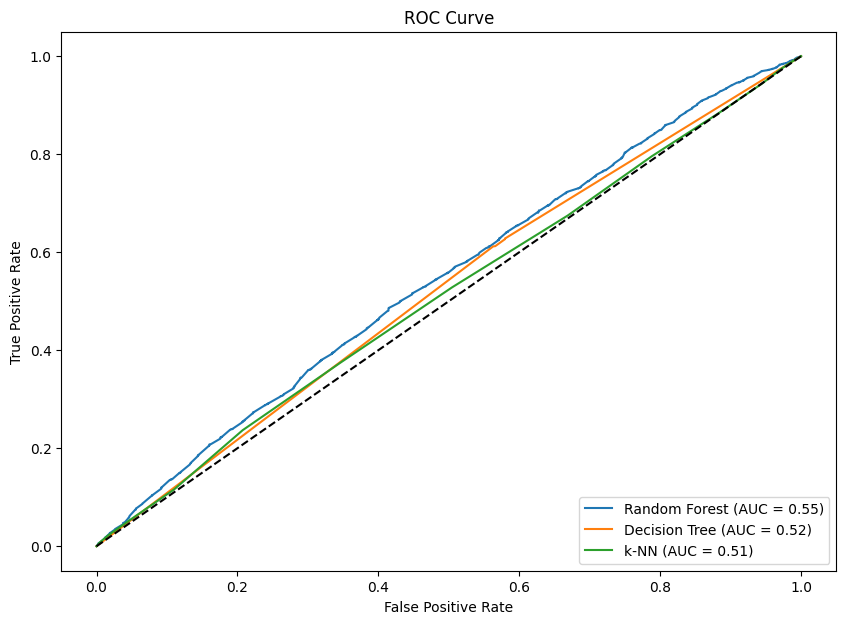

In [20]:
# Plot ROC curves
plt.figure(figsize=(10, 7))
for name, (fpr, tpr, roc_auc) in roc_auc_scores.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [21]:
# Process test data similarly
df_test = df_test.drop(columns=['Roll no'])
X_test_dummies = pd.get_dummies(df_test, columns=['test preparation ', 'gender', 'lunch', 'Section', 'parental level of education'], drop_first=True)
X_test_dummies = X_test_dummies.reindex(columns=X_train_dummies.columns, fill_value=0)

In [22]:
# Scale all columns in the test set
X_test_dummies_scaled = scaler.transform(X_test_dummies)
X_test_dummies_scaled = pd.DataFrame(X_test_dummies_scaled, columns=X_test_dummies.columns)

In [23]:
# Predict and save results for each model
for name, model in models.items():
    y_test_pred = model.predict(X_test_dummies_scaled)
    df_test[f'pass_fail_{name}'] = y_test_pred

df_test.to_csv('/content/test_with_predictions.csv', index=False)